In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from numpy import loadtxt
import numpy as np
import keras
from sklearn.metrics import f1_score

Using TensorFlow backend.


In [2]:
mnist = keras.datasets.mnist

ERROR! Session/line number was not unique in database. History logging moved to new session 288


In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

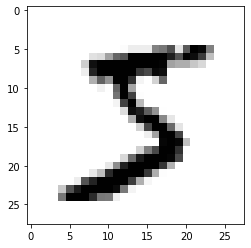

In [4]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [5]:
#normalizing data
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)
x_train.shape

(60000, 28, 28)

In [6]:
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self,logs=None):
        print("Training started")
        
    def on_train_end(self,logs=None):
        print("Training ended")

In [7]:
class SimpleDense(keras.layers.Layer):

  def __init__(self, units=32,**kwargs):
      super(SimpleDense, self).__init__(**kwargs)
      self.units = units

  def build(self, input_shape):
      global layer
      layer = layer+1
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_uniform',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)
      self.add_metric(self.w,name='k1_'+str(layer))
      self.add_metric(self.b,name='k0_'+str(layer))   
      super(SimpleDense,self).build(input_shape=(input_shape[-1],self.units))

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

In [9]:
layer = 0
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(30))
model.add(SimpleDense(30))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
simple_dense_1 (SimpleDense) (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, epochs=25, validation_data = (x_test,y_test),callbacks = [CustomCallback()])

Train on 60000 samples, validate on 10000 samples
Training started
Epoch 1/25
60000/60000 [==============================] - 8s 141us/step - loss: 0.4333 - accuracy: 0.8782 - k1_1: 0.0042 - k0_1: -0.0213 - val_loss: 0.2987 - val_accuracy: 0.9142 - val_k1_1: 0.0043 - val_k0_1: -0.0308
Epoch 2/25
60000/60000 [==============================] - 6s 105us/step - loss: 0.2923 - accuracy: 0.9161 - k1_1: 0.0048 - k0_1: -0.0391 - val_loss: 0.2840 - val_accuracy: 0.9195 - val_k1_1: 0.0051 - val_k0_1: -0.0463
Epoch 3/25
60000/60000 [==============================] - 7s 123us/step - loss: 0.2774 - accuracy: 0.9211 - k1_1: 0.0051 - k0_1: -0.0532 - val_loss: 0.2802 - val_accuracy: 0.9204 - val_k1_1: 0.0051 - val_k0_1: -0.0598
Epoch 4/25
60000/60000 [==============================] - 7s 114us/step - loss: 0.2697 - accuracy: 0.9230 - k1_1: 0.0053 - k0_1: -0.0657 - val_loss: 0.2765 - val_accuracy: 0.9238 - val_k1_1: 0.0053 - val_k0_1: -0.0708
Epoch 5/25
60000/60000 [==============================] - 7s 

In [11]:
y_pred1 = model.predict(x_test)
y_preds = np.array([])
for i in range(len(y_test)):
    y_preds = np.append(y_preds,np.argmax(y_pred1[i]))
print("The F1 Score for the current model is = ",f1_score(y_test,y_preds,average="macro"))

The F1 Score for the current model is =  0.9190421488784034


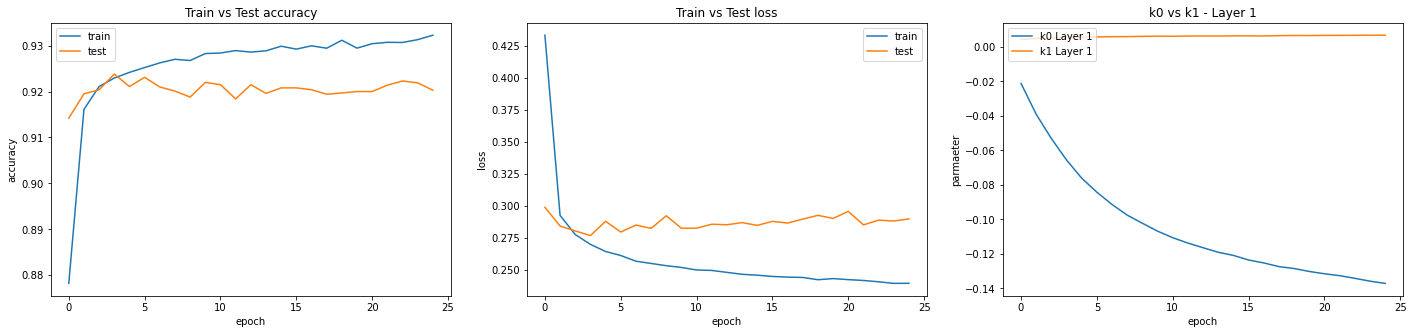

In [12]:
fig,axis = plt.subplots(1,3,figsize=(20,5))#,sharex=True, sharey=True)
fig.set_tight_layout({'pad':2})
#accuracy
axis[0].plot(history.history['accuracy'])
axis[0].plot(history.history['val_accuracy'])
axis[0].set_title('Train vs Test accuracy')
axis[0].set_ylabel('accuracy')
axis[0].set_xlabel('epoch')
axis[0].legend(['train','test'], loc='upper left')

#loss
axis[1].plot(history.history['loss'])
axis[1].plot(history.history['val_loss'])
axis[1].set_title('Train vs Test loss')
axis[1].set_ylabel('loss')
axis[1].set_xlabel('epoch')
axis[1].legend(['train','test'], loc='upper right')

#k0 and k1 updates first layer
axis[2].plot(history.history['k0_1'])
axis[2].plot(history.history['k1_1'])
axis[2].set_title('k0 vs k1 - Layer 1')
axis[2].set_ylabel('parmaeter')
axis[2].set_xlabel('epoch')
axis[2].legend(['k0 Layer 1','k1 Layer 1'], loc='upper left')

plt.show()
fig.savefig('Metrics.png')